# Projeto Rede: Scale-free

In [1]:
import os
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.ndimage import binary_dilation
from pylab import *
from time import sleep
import sys

plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    "text.usetex": True,
    "grid.alpha": .5,
})
plt.style.use('ggplot')

In [2]:
def potx(x,a,y):
    return a*np.power(x,y)
def ax(x,a,b):
    return a*x+b

## Modelo de Barabási-Albert

1) Começar com um número $m_0$ de pontos, e a cada passo um novo nodo é adicionado e conectado a $m<m_0$ pontos já existentes;

2) Preferential Attachment ⇨ A probabilidade $\Pi_i$ de conexão com cada ponto $m_i$ já existente depende do grau $k_i$ de cada ponto:  $$\Pi_i= \frac{k_i}{\sum_j k_j}$$  

Obtendo uma distribuição de grau obedecendo uma lei de pontência:$$P(k)\propto \frac{1}{{k}^{\gamma}}$$

No modelo BA: $\gamma=3$ ; (lim ${k\rightarrow \infty}$)

### Método 1: Código _manual_ 


Feito num formato circular, começando com três pontos ligados entre si:

Começando com $m_0$=3 e crescendo até N pontos (nodes)

#### Exemplo

6.0 1.0


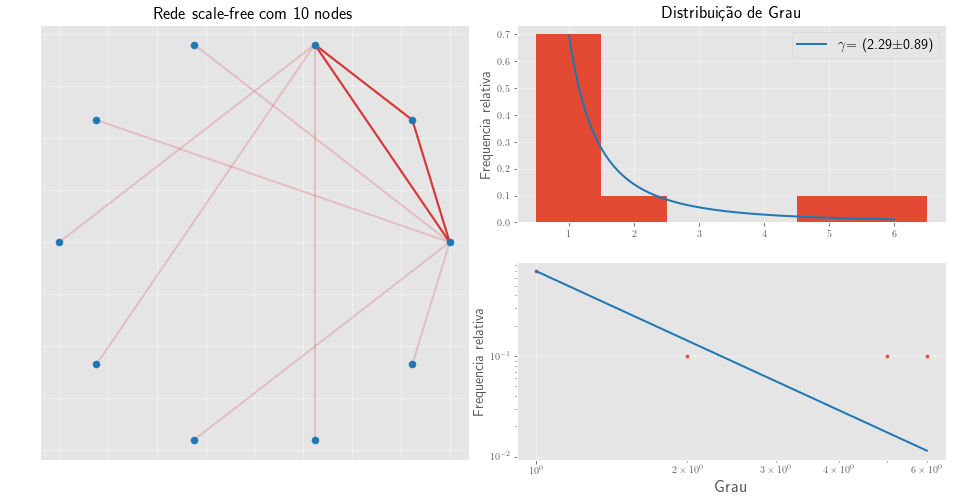

In [3]:
N=10

ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

links=np.zeros(len(ang))
links[0]=2
links[1]=2
links[2]=2


fig= plt.figure(figsize=(16.25,8))
plot1 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
plt.subplots_adjust(wspace=0.25)
plot2 = plt.subplot2grid((2, 4), (0, 2), colspan=2)
plot3 = plt.subplot2grid((2, 4), (1, 2), colspan=2)
prim=[0,1,2]
for i in range(3):
    outros=[p for p in prim if p!=i]
    x1,y1=np.cos(ang[i]),np.sin(ang[i])
    for p in outros:
        x2,y2=np.cos(ang[p]),np.sin(ang[p])
        plot1.plot([x1,x2],[y1,y2], '-',c='tab:red',alpha=.7, lw=2, zorder=1)
for i in range(3,N):
    prob=links/np.sum(links)
    x1,y1=np.cos(ang[i]),np.sin(ang[i])  
    [ang_rand1, ang_rand2]=np.random.choice(ang,2,p=prob,replace=False)
    x2,y2=np.cos(ang_rand1),np.sin(ang_rand1)
    #x3,y3=np.cos(ang_rand2),np.sin(ang_rand2)
    plot1.plot([x1,x2],[y1,y2], '-',c='tab:red',alpha=.2, lw=2, zorder=1)
    #plot1.plot([x1,x3],[y1,y3], '-',c='tab:red',alpha=.2, lw=2, zorder=1)
    links[ang.index(ang[i])]+=1
    links[ang.index(ang_rand1)]+=1
    #links[ang.index(ang_rand2)]+=1
    #print(prob)
plot1.scatter(np.cos(ang),np.sin(ang), marker='o',color='tab:blue',s=50,zorder=2)
plot1.tick_params(axis='x', colors='white')
plot1.tick_params(axis='y', colors='white')
#plt.plot([-1, 1], [0, 0], 'k-', lw=2)
print(max(links),min(links))
y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(min(links),np.max(links)+1),density=True)
x =xb[:-1]
y0=y[y != 0]
x0=x[y != 0]
popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
b=abs(popt0[1])
sb=(np.sqrt(np.diag(pcov)))[1]
#print(b,sb)
#print(x0[:5])
plot2.bar(x,y,align='center',width=1)
xfit=np.linspace(x0[0],x0[-1],100)
plot2.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2,label=r'$\gamma$= '+r'({:.2f}$\pm${:.2f})'.format(b,sb))


plot3.scatter(x,y,s=10)
xfit=np.geomspace(x0[0],x0[-1],50)
plot3.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2)
plot3.set_yscale('log')
plot3.set_xscale('log')
plot3.set_xlabel('Grau',fontsize='xx-large')
plot3.set_ylabel('Frequencia relativa',fontsize='x-large')
plot2.legend(fontsize='x-large')
plot2.set_ylabel('Frequencia relativa',fontsize='x-large')

plot1.set_title('Rede scale-free com '+str(N)+' nodes',fontsize='xx-large')
plot2.set_title('Distribuição de Grau',fontsize='xx-large')
#plt.ylim(.9e-4,1)
fig.savefig('grafico1.png', bbox_inches='tight', dpi=100)
plt.show()


#### Conectando a 1 ponto em cada iteração

321.0 1.0


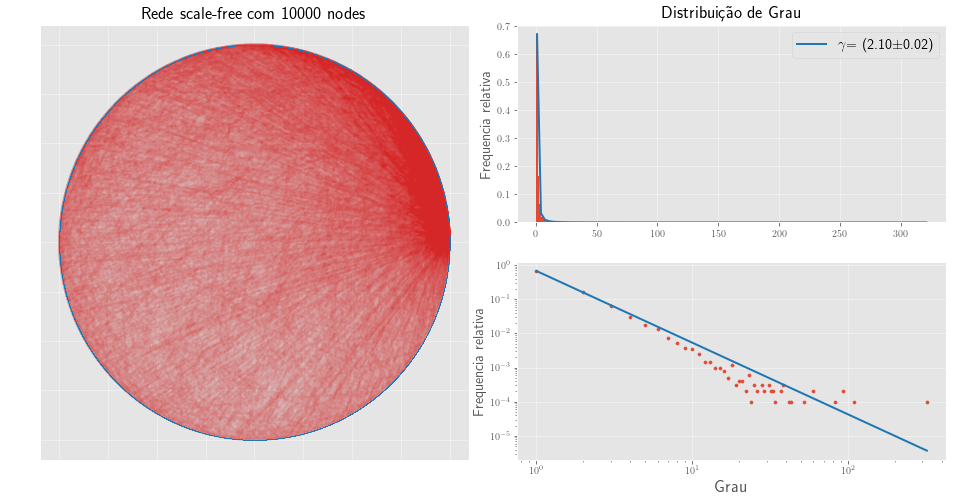

In [7]:
N=10000

ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

links=np.zeros(len(ang))
links[0]=2
links[1]=2
links[2]=2


fig= plt.figure(figsize=(16.25,8))
plot1 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
plt.subplots_adjust(wspace=0.25)
plot2 = plt.subplot2grid((2, 4), (0, 2), colspan=2)
plot3 = plt.subplot2grid((2, 4), (1, 2), colspan=2)
prim=[0,1,2]
for i in range(3):
    outros=[p for p in prim if p!=i]
    x1,y1=np.cos(ang[i]),np.sin(ang[i])
    for p in outros:
        x2,y2=np.cos(ang[p]),np.sin(ang[p])
        plot1.plot([x1,x2],[y1,y2], '-',c='tab:red',alpha=.02, lw=2, zorder=1)
for i in range(3,N):
    prob=links/np.sum(links)
    x1,y1=np.cos(ang[i]),np.sin(ang[i])  
    [ang_rand1, ang_rand2]=np.random.choice(ang,2,p=prob,replace=False)
    x2,y2=np.cos(ang_rand1),np.sin(ang_rand1)
    #x3,y3=np.cos(ang_rand2),np.sin(ang_rand2)
    plot1.plot([x1,x2],[y1,y2], '-',c='tab:red',alpha=.02, lw=2, zorder=1)
    #plot1.plot([x1,x3],[y1,y3], '-',c='tab:red',alpha=.2, lw=2, zorder=1)
    links[ang.index(ang[i])]+=1
    links[ang.index(ang_rand1)]+=1
    #links[ang.index(ang_rand2)]+=1
    #print(prob)
plot1.scatter(np.cos(ang),np.sin(ang), marker='o',color='tab:blue',s=.1,zorder=2)
plot1.tick_params(axis='x', colors='white')
plot1.tick_params(axis='y', colors='white')
#plt.plot([-1, 1], [0, 0], 'k-', lw=2)
print(max(links),min(links))
y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(min(links),np.max(links)+1),density=True)
x =xb[:-1]
y0=y[y != 0]
x0=x[y != 0]
popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
b=abs(popt0[1])
sb=(np.sqrt(np.diag(pcov)))[1]
#print(b,sb)
#print(x0[:5])
plot2.bar(x,y,align='center',width=1)
xfit=np.linspace(x0[0],x0[-1],100)
plot2.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2,label=r'$\gamma$= '+r'({:.2f}$\pm${:.2f})'.format(b,sb))


plot3.scatter(x,y,s=10)
xfit=np.geomspace(x0[0],x0[-1],50)
plot3.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2)
plot3.set_yscale('log')
plot3.set_xscale('log')
plot3.set_xlabel('Grau',fontsize='xx-large')
plot3.set_ylabel('Frequencia relativa',fontsize='x-large')
plot2.legend(fontsize='x-large')
plot2.set_ylabel('Frequencia relativa',fontsize='x-large')

plot1.set_title('Rede scale-free com '+str(N)+' nodes',fontsize='xx-large')
plot2.set_title('Distribuição de Grau',fontsize='xx-large')
#plt.ylim(.9e-4,1)
fig.savefig('grafico2.png', bbox_inches='tight', dpi=100)
plt.show()


#### Conectando a 2 pontos

244.0 2.0


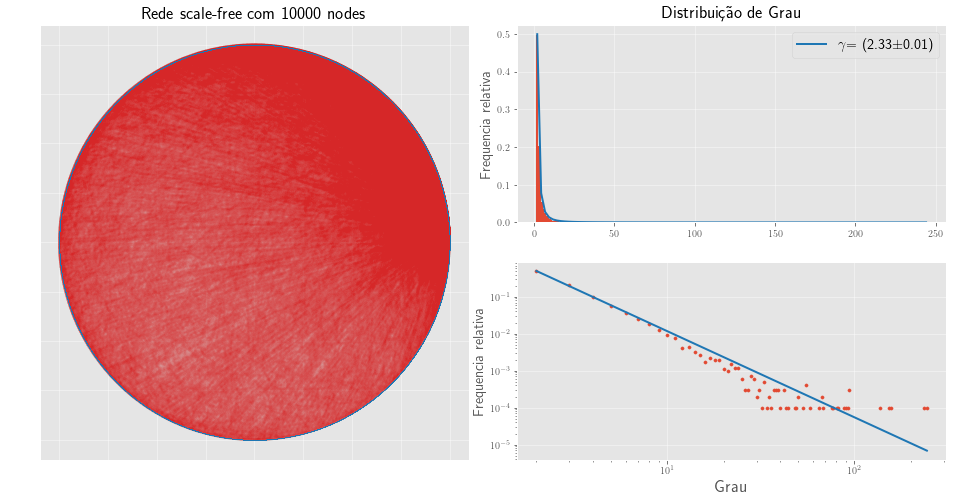

In [5]:
N=10000
m0=3
ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

links=np.zeros(len(ang))

links[0]=2
links[1]=2
links[2]=2


fig= plt.figure(figsize=(16.25,8))
plot1 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
plt.subplots_adjust(wspace=0.25)
plot2 = plt.subplot2grid((2, 4), (0, 2), colspan=2)
plot3 = plt.subplot2grid((2, 4), (1, 2), colspan=2)
prim=[0,1,2]
for i in range(3):
    outros=[p for p in prim if p!=i]
    x1,y1=np.cos(ang[i]),np.sin(ang[i])
    for p in outros:
        x2,y2=np.cos(ang[p]),np.sin(ang[p])
        plot1.plot([x1,x2],[y1,y2], '-',c='tab:red',alpha=.02, lw=2, zorder=1)
for i in range(3,N):
    prob=links/np.sum(links)
    x1,y1=np.cos(ang[i]),np.sin(ang[i])  
    lista=np.random.choice(ang,m0-1,p=prob)
    for ang_rand in lista.tolist():
        x2,y2=np.cos(ang_rand),np.sin(ang_rand)
        plot1.plot([x1,x2],[y1,y2], '-',c='tab:red',alpha=.02, lw=2, zorder=1)
        links[ang.index(ang_rand)]+=1
    #plot1.plot([x1,x3],[y1,y3], '-',c='tab:red',alpha=.2, lw=2, zorder=1)
    links[ang.index(ang[i])]+=len(lista)
    #print(prob)
plot1.scatter(np.cos(ang),np.sin(ang), marker='o',color='tab:blue',s=.1,zorder=2)
plot1.tick_params(axis='x', colors='white')
plot1.tick_params(axis='y', colors='white')
#plt.plot([-1, 1], [0, 0], 'k-', lw=2)
print(max(links),min(links))
y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(min(links),np.max(links)+1),density=True)
x =xb[:-1]
y0=y[y != 0]
x0=x[y != 0]
popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
b=abs(popt0[1])
sb=(np.sqrt(np.diag(pcov)))[1]
plot2.bar(x,y,align='center',width=1)
xfit=np.linspace(x0[0],x0[-1],100)
plot2.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2,label=r'$\gamma$= '+r'({:.2f}$\pm${:.2f})'.format(b,sb))


plot3.scatter(x,y,s=10)
xfit=np.geomspace(x0[0],x0[-1],50)
plot3.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2)
plot3.set_yscale('log')
plot3.set_xscale('log')
plot3.set_xlabel('Grau',fontsize='xx-large')
plot3.set_ylabel('Frequencia relativa',fontsize='x-large')
plot2.legend(fontsize='x-large')
plot2.set_ylabel('Frequencia relativa',fontsize='x-large')

plot1.set_title('Rede scale-free com '+str(N)+' nodes',fontsize='xx-large')
plot2.set_title('Distribuição de Grau',fontsize='xx-large')
fig.savefig('grafico3.png', bbox_inches='tight', dpi=100)
#plt.ylim(.9e-4,1)
plt.show()


#### Conctando a 3 pontos

484.0 3.0


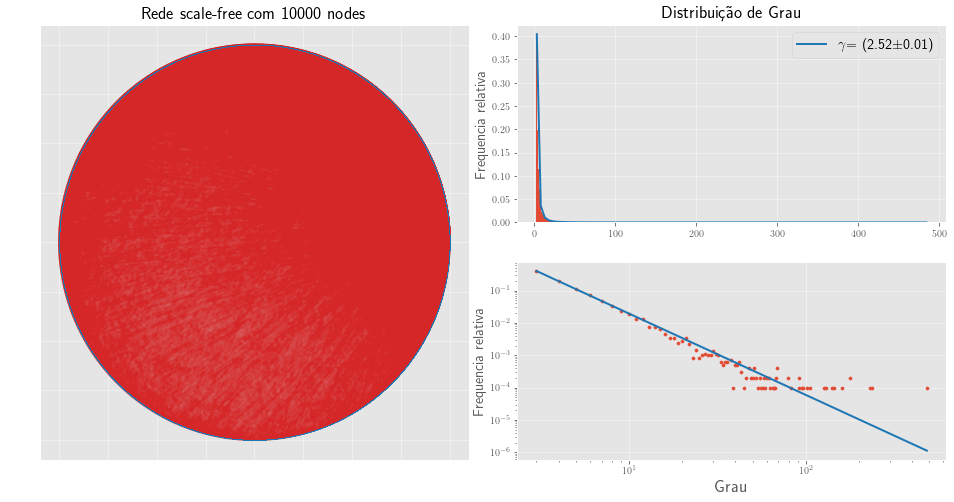

In [6]:
N=10000
m0=3
ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

links=np.zeros(len(ang))

links[0]=2
links[1]=2
links[2]=2


fig= plt.figure(figsize=(16.25,8))
plot1 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
plt.subplots_adjust(wspace=0.25)
plot2 = plt.subplot2grid((2, 4), (0, 2), colspan=2)
plot3 = plt.subplot2grid((2, 4), (1, 2), colspan=2)
prim=[0,1,2]
for i in range(3):
    outros=[p for p in prim if p!=i]
    x1,y1=np.cos(ang[i]),np.sin(ang[i])
    for p in outros:
        x2,y2=np.cos(ang[p]),np.sin(ang[p])
        plot1.plot([x1,x2],[y1,y2], '-',c='tab:red',alpha=.02, lw=2, zorder=1)
for i in range(3,N):
    prob=links/np.sum(links)
    x1,y1=np.cos(ang[i]),np.sin(ang[i])  
    lista=np.random.choice(ang,m0,p=prob)
    for ang_rand in lista.tolist():
        x2,y2=np.cos(ang_rand),np.sin(ang_rand)
        plot1.plot([x1,x2],[y1,y2], '-',c='tab:red',alpha=.02, lw=2, zorder=1)
        links[ang.index(ang_rand)]+=1
    #plot1.plot([x1,x3],[y1,y3], '-',c='tab:red',alpha=.2, lw=2, zorder=1)
    links[ang.index(ang[i])]+=len(lista)
    #print(prob)
plot1.scatter(np.cos(ang),np.sin(ang), marker='o',color='tab:blue',s=.1,zorder=2)
plot1.tick_params(axis='x', colors='white')
plot1.tick_params(axis='y', colors='white')
#plt.plot([-1, 1], [0, 0], 'k-', lw=2)
print(max(links),min(links))
y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(min(links),np.max(links)+1),density=True)
x =xb[:-1]
y0=y[y != 0]
x0=x[y != 0]
popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
b=abs(popt0[1])
sb=(np.sqrt(np.diag(pcov)))[1]
plot2.bar(x,y,align='center',width=1)
xfit=np.linspace(x0[0],x0[-1],100)
plot2.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2,label=r'$\gamma$= '+r'({:.2f}$\pm${:.2f})'.format(b,sb))


plot3.scatter(x,y,s=10)
xfit=np.geomspace(x0[0],x0[-1],50)
plot3.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2)
plot3.set_yscale('log')
plot3.set_xscale('log')
plot3.set_xlabel('Grau',fontsize='xx-large')
plot3.set_ylabel('Frequencia relativa',fontsize='x-large')
plot2.legend(fontsize='x-large')
plot2.set_ylabel('Frequencia relativa',fontsize='x-large')

plot1.set_title('Rede scale-free com '+str(N)+' nodes',fontsize='xx-large')
plot2.set_title('Distribuição de Grau',fontsize='xx-large')
fig.savefig('grafico4.png', bbox_inches='tight', dpi=100)
#plt.ylim(.9e-4,1)
plt.show()


### Método 2: Networkx 

*import networkx as nx*

Número de nodes : $N=10000$

Número de arestas para conectar em cada iteração: $m=3$ 

 
    
<center> G_barabasi = nx.barabasi_albert_graph(n,m)  </center>

In [8]:
import networkx as nx

#### Conectando 1 ponto

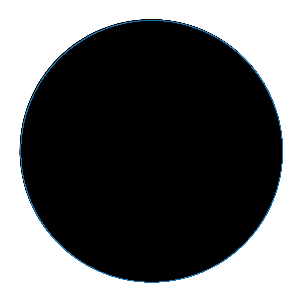

In [9]:
n = 10000

m = 1

G_barabasi = nx.barabasi_albert_graph(n,m)
plt.figure(figsize=(4,4))
nx.draw_circular(G_barabasi, node_size=.1)
plt.show()

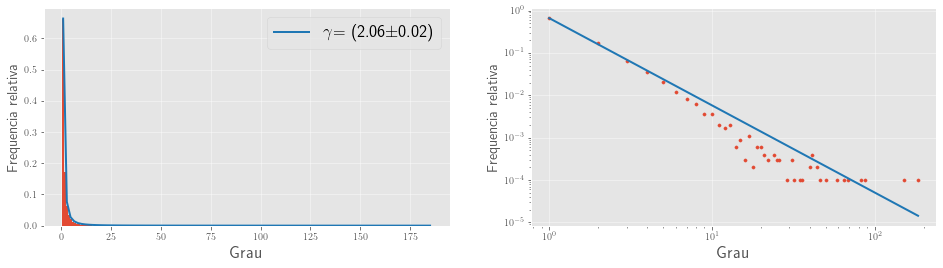

In [10]:
degree_freq = nx.degree_histogram(G_barabasi)
degrees = arange(len(degree_freq))

x=degrees[m:].tolist()
y=degree_freq[m:]/np.sum(degree_freq[m:])

y0=[yi for yi in y if yi!=0]
x0=[xi for xi,yi in zip(x,y) if yi!=0]

fig=plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
b=abs(popt0[1])
sb=(np.sqrt(np.diag(pcov)))[1]

plt.bar(x,y,align='center',width=1)
xfit=np.linspace(x0[0],x0[-1],100)
plt.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2,label=r'$\gamma$= '+r'({:.2f}$\pm${:.2f})'.format(b,sb))
plt.legend()
plt.ylabel('Frequencia relativa',fontsize='x-large')
plt.xlabel('Grau',fontsize='xx-large')
plt.legend(fontsize='xx-large')
plt.subplot(1,2,2)
plt.scatter(x,y,s=10)
xfit=np.geomspace(x0[0],x0[-1],50)
plt.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Grau',fontsize='xx-large')
plt.ylabel('Frequencia relativa',fontsize='x-large')

fig.savefig('grafico5.png', bbox_inches='tight', dpi=100)

plt.show()

#### Conectando 2 pontos

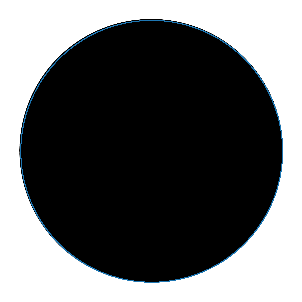

In [11]:
n = 10000

m = 2

G_barabasi = nx.barabasi_albert_graph(n,m)
plt.figure(figsize=(4,4))
nx.draw_circular(G_barabasi, node_size=.1)
plt.show()

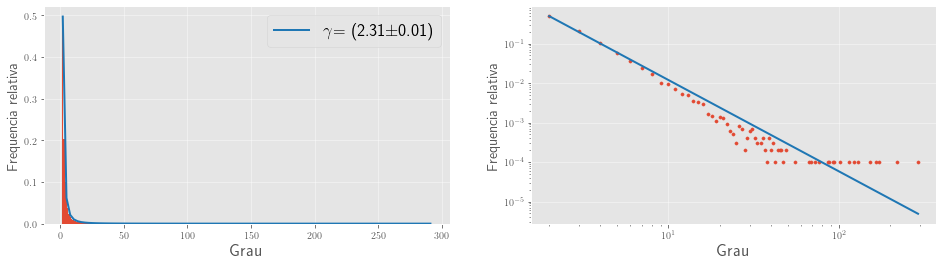

In [12]:
degree_freq = nx.degree_histogram(G_barabasi)
degrees = arange(len(degree_freq))

x=degrees[m:].tolist()
y=degree_freq[m:]/np.sum(degree_freq[m:])

y0=[yi for yi in y if yi!=0]
x0=[xi for xi,yi in zip(x,y) if yi!=0]

fig=plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
b=abs(popt0[1])
sb=(np.sqrt(np.diag(pcov)))[1]

plt.bar(x,y,align='center',width=1)
xfit=np.linspace(x0[0],x0[-1],100)
plt.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2,label=r'$\gamma$= '+r'({:.2f}$\pm${:.2f})'.format(b,sb))
plt.legend()
plt.ylabel('Frequencia relativa',fontsize='x-large')
plt.xlabel('Grau',fontsize='xx-large')
plt.legend(fontsize='xx-large')
plt.subplot(1,2,2)
plt.scatter(x,y,s=10)
xfit=np.geomspace(x0[0],x0[-1],50)
plt.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Grau',fontsize='xx-large')
plt.ylabel('Frequencia relativa',fontsize='x-large')

fig.savefig('grafico6.png', bbox_inches='tight', dpi=100)
plt.show()

#### Conectando 3 pontos

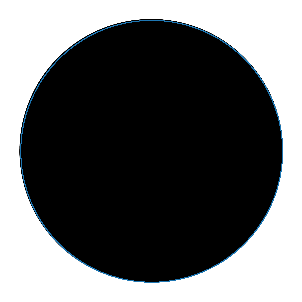

In [13]:
n = 10000

m = 3

G_barabasi = nx.barabasi_albert_graph(n,m)
plt.figure(figsize=(4,4))
nx.draw_circular(G_barabasi, node_size=.1)
plt.show()

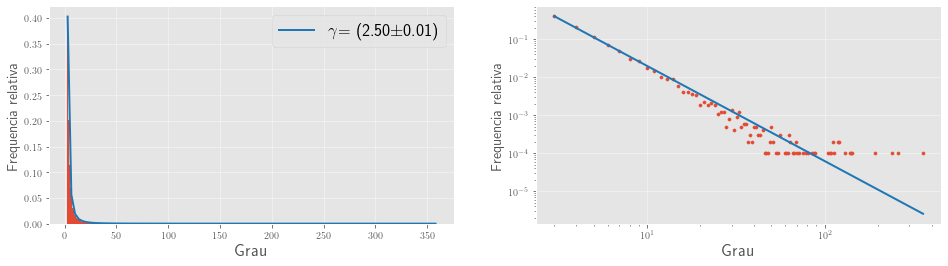

In [14]:
degree_freq = nx.degree_histogram(G_barabasi)
degrees = arange(len(degree_freq))

x=degrees[m:].tolist()
y=degree_freq[m:]/np.sum(degree_freq[m:])

y0=[yi for yi in y if yi!=0]
x0=[xi for xi,yi in zip(x,y) if yi!=0]

fig=plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
b=abs(popt0[1])
sb=(np.sqrt(np.diag(pcov)))[1]

plt.bar(x,y,align='center',width=1)
xfit=np.linspace(x0[0],x0[-1],100)
plt.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2,label=r'$\gamma$= '+r'({:.2f}$\pm${:.2f})'.format(b,sb))
plt.legend()
plt.ylabel('Frequencia relativa',fontsize='x-large')
plt.xlabel('Grau',fontsize='xx-large')
plt.legend(fontsize='xx-large')
plt.subplot(1,2,2)
plt.scatter(x,y,s=10)
xfit=np.geomspace(x0[0],x0[-1],50)
plt.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Grau',fontsize='xx-large')
plt.ylabel('Frequencia relativa',fontsize='x-large')

fig.savefig('grafico7.png', bbox_inches='tight', dpi=100)

plt.show()

### Método 3: Diagrama Linearizado de Cordas (LCD) 

Descrito por Ballobás. Feito para suprir algumas falhas:

1) Como é a configuração inicial dos $m_0$ pontos (*nodes*) iniciais?

2) Se os links são completamente independentes, os pontos podem se ligar com eles mesmo?

====================================================================================================================

A configuração é descrita por $G_m^{(t)}$

O método consiste de dois passos principais:
Para $m=1$

1) Começar com uma configuração inicial $G_1^{(0)}$ correspondente ao gráfico vazio

2) Dado uma configuração $G_1^{(t-1)}$ gerar $G_1^{(t)}$ adicionando um *node* $v_t$ e uma única ligação entre $v_t$ e $v_i$, onde $v_i$ é escolhido com uma probabilidade p:

<center> $p=\frac{k_i}{2\,t-1}$ se $1\leq i\leq t-1$


<center> $p=\frac{1}{2\,t-1}$ se $i = t$ (ele mesmo)


#### Conectando a 1 ponto

240.0 1.0


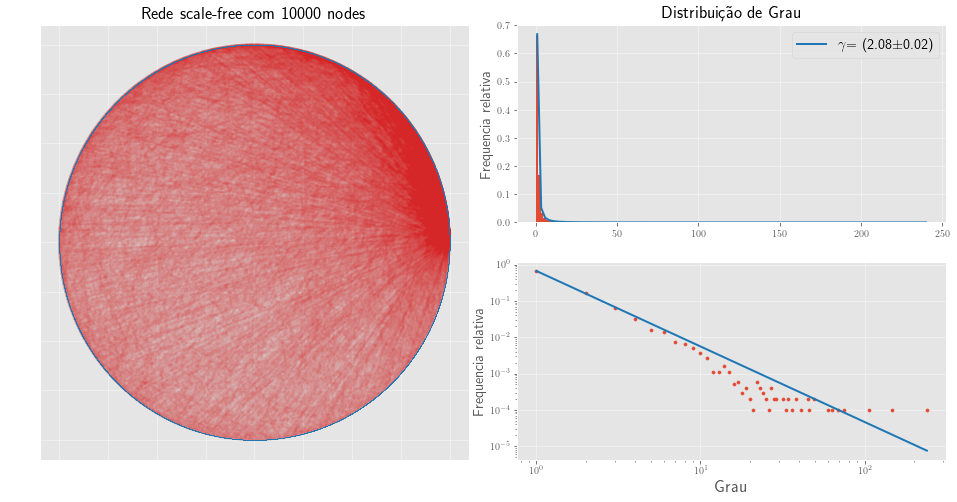

In [15]:
N=10000

ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

links=np.zeros(len(ang))

links[0]=2

fig= plt.figure(figsize=(16.25,8))
plot1 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
plt.subplots_adjust(wspace=0.25)
plot2 = plt.subplot2grid((2, 4), (0, 2), colspan=2)
plot3 = plt.subplot2grid((2, 4), (1, 2), colspan=2)


for i in range(1,N):
    x1,y1=np.cos(ang[i]),np.sin(ang[i])  
    prob=links/(2*(i+1)-1)
    prob[i]=1/(2*(i+1)-1)
    #print(prob)
    ang_rand=np.random.choice(ang,p=prob)
    x2,y2=np.cos(ang_rand),np.sin(ang_rand)
    plot1.plot([x1,x2],[y1,y2], '-',c='tab:red',alpha=.02, lw=2, zorder=1)
    links[ang.index(ang_rand)]+=1 #end
    links[ang.index(ang[i])]+=1 #start

plot1.scatter(np.cos(ang),np.sin(ang), marker='o',color='tab:blue',s=.1,zorder=2)
plot1.tick_params(axis='x', colors='white')
plot1.tick_params(axis='y', colors='white')
print(max(links),min(links))

y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(min(links),np.max(links)+1),density=True)
x =xb[:-1]
y0=y[y != 0]
x0=x[y != 0]
popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
b=abs(popt0[1])
sb=(np.sqrt(np.diag(pcov)))[1]
plot2.bar(x,y,align='center',width=1)
xfit=np.linspace(x0[0],x0[-1],100)
plot2.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2,label=r'$\gamma$= '+r'({:.2f}$\pm${:.2f})'.format(b,sb))


plot3.scatter(x,y,s=10)
xfit=np.geomspace(x0[0],x0[-1],50)
plot3.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2)
plot3.set_yscale('log')
plot3.set_xscale('log')
plot3.set_xlabel('Grau',fontsize='xx-large')
plot3.set_ylabel('Frequencia relativa',fontsize='x-large')
plot2.legend(fontsize='x-large')
plot2.set_ylabel('Frequencia relativa',fontsize='x-large')

plot1.set_title('Rede scale-free com '+str(N)+' nodes',fontsize='xx-large')
plot2.set_title('Distribuição de Grau',fontsize='xx-large')
#plt.ylim(.9e-4,1)
fig.savefig('grafico8.png', bbox_inches='tight', dpi=100)
plt.show()


#### Conectando a 2 ponto

382.0 2.0


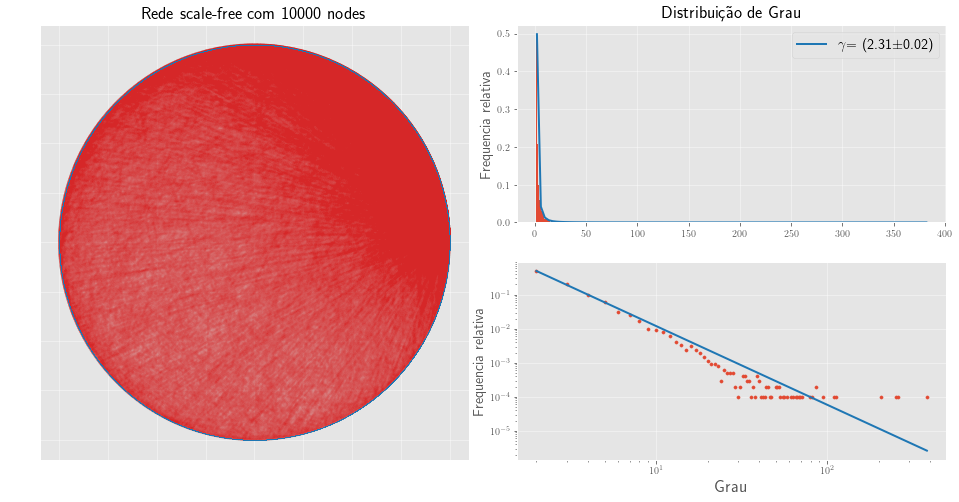

In [16]:
N=10000
m=2
ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

links=np.zeros(len(ang))

links[0]=m*2

fig= plt.figure(figsize=(16.25,8))
plot1 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
plt.subplots_adjust(wspace=0.25)
plot2 = plt.subplot2grid((2, 4), (0, 2), colspan=2)
plot3 = plt.subplot2grid((2, 4), (1, 2), colspan=2)

t=3
for i in range(1,N):
    x1,y1=np.cos(ang[i]),np.sin(ang[i])  
    for mi in range(m):
        if mi==0:
            prob=links/(2*(t)-1)
            prob[i]=1/(2*(t)-1)
            t+=1
            #print(prob,np.sum(prob))
            ang_rand=np.random.choice(ang,p=prob)
            x2,y2=np.cos(ang_rand),np.sin(ang_rand)
            plot1.plot([x1,x2],[y1,y2], '-',c='tab:red',alpha=.02, lw=2, zorder=1)
            links[ang.index(ang_rand)]+=1 #end
            links[ang.index(ang[i])]+=1 #start
        else:
            prob=links/(2*(t)-2)
            t+=1
            #print(prob,np.sum(prob))
            ang_rand=np.random.choice(ang,p=prob)
            x2,y2=np.cos(ang_rand),np.sin(ang_rand)
            plot1.plot([x1,x2],[y1,y2], '-',c='tab:red',alpha=.02, lw=2, zorder=1)
            links[ang.index(ang_rand)]+=1 #end
            links[ang.index(ang[i])]+=1 #start
plot1.scatter(np.cos(ang),np.sin(ang), marker='o',color='tab:blue',s=.1,zorder=2)
plot1.tick_params(axis='x', colors='white')
plot1.tick_params(axis='y', colors='white')
print(max(links),min(links))

y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(min(links),np.max(links)+1),density=True)
x =xb[:-1]
y0=y[y != 0]
x0=x[y != 0]
popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
b=abs(popt0[1])
sb=(np.sqrt(np.diag(pcov)))[1]
plot2.bar(x,y,align='center',width=1)
xfit=np.linspace(x0[0],x0[-1],100)
plot2.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2,label=r'$\gamma$= '+r'({:.2f}$\pm${:.2f})'.format(b,sb))


plot3.scatter(x,y,s=10)
xfit=np.geomspace(x0[0],x0[-1],50)
plot3.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2)
plot3.set_yscale('log')
plot3.set_xscale('log')
plot3.set_xlabel('Grau',fontsize='xx-large')
plot3.set_ylabel('Frequencia relativa',fontsize='x-large')
plot2.legend(fontsize='x-large')
plot2.set_ylabel('Frequencia relativa',fontsize='x-large')

plot1.set_title('Rede scale-free com '+str(N)+' nodes',fontsize='xx-large')
plot2.set_title('Distribuição de Grau',fontsize='xx-large')
#plt.ylim(.9e-4,1)
fig.savefig('grafico9.png', bbox_inches='tight', dpi=100)
plt.show()


#### Conectando a 3 ponto

809.0 3.0


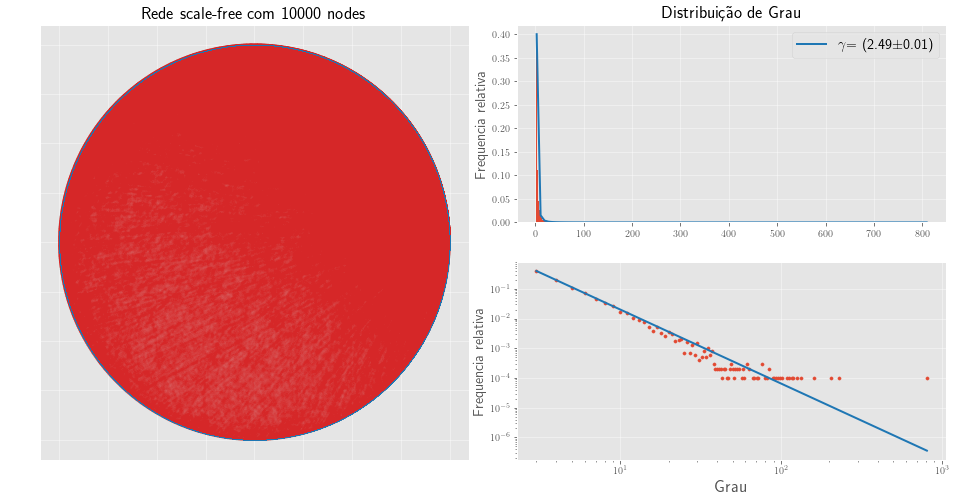

In [17]:
N=10000
m=3
ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

links=np.zeros(len(ang))

links[0]=m*2

fig= plt.figure(figsize=(16.25,8))
plot1 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
plt.subplots_adjust(wspace=0.25)
plot2 = plt.subplot2grid((2, 4), (0, 2), colspan=2)
plot3 = plt.subplot2grid((2, 4), (1, 2), colspan=2)

t=4
for i in range(1,N):
    x1,y1=np.cos(ang[i]),np.sin(ang[i])  
    for mi in range(m):
        if mi==0:
            prob=links/(2*(t)-1)
            prob[i]=1/(2*(t)-1)
            t+=1
            #print(prob,np.sum(prob))
            ang_rand=np.random.choice(ang,p=prob)
            x2,y2=np.cos(ang_rand),np.sin(ang_rand)
            plot1.plot([x1,x2],[y1,y2], '-',c='tab:red',alpha=.02, lw=2, zorder=1)
            links[ang.index(ang_rand)]+=1 #end
            links[ang.index(ang[i])]+=1 #start
        else:
            prob=links/(2*(t)-2)
            t+=1
            #print(prob,np.sum(prob))
            ang_rand=np.random.choice(ang,p=prob)
            x2,y2=np.cos(ang_rand),np.sin(ang_rand)
            plot1.plot([x1,x2],[y1,y2], '-',c='tab:red',alpha=.02, lw=2, zorder=1)
            links[ang.index(ang_rand)]+=1 #end
            links[ang.index(ang[i])]+=1 #start
plot1.scatter(np.cos(ang),np.sin(ang), marker='o',color='tab:blue',s=.1,zorder=2)
plot1.tick_params(axis='x', colors='white')
plot1.tick_params(axis='y', colors='white')
print(max(links),min(links))

y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(min(links),np.max(links)+1),density=True)
x =xb[:-1]
y0=y[y != 0]
x0=x[y != 0]
popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
b=abs(popt0[1])
sb=(np.sqrt(np.diag(pcov)))[1]
plot2.bar(x,y,align='center',width=1)
xfit=np.linspace(x0[0],x0[-1],100)
plot2.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2,label=r'$\gamma$= '+r'({:.2f}$\pm${:.2f})'.format(b,sb))


plot3.scatter(x,y,s=10)
xfit=np.geomspace(x0[0],x0[-1],50)
plot3.plot(xfit,potx(xfit,*popt0),color='tab:blue',linewidth=2)
plot3.set_yscale('log')
plot3.set_xscale('log')
plot3.set_xlabel('Grau',fontsize='xx-large')
plot3.set_ylabel('Frequencia relativa',fontsize='x-large')
plot2.legend(fontsize='x-large')
plot2.set_ylabel('Frequencia relativa',fontsize='x-large')

plot1.set_title('Rede scale-free com '+str(N)+' nodes',fontsize='xx-large')
plot2.set_title('Distribuição de Grau',fontsize='xx-large')
#plt.ylim(.9e-4,1)
fig.savefig('grafico10.png', bbox_inches='tight', dpi=100)
plt.show()


## To do List

### Repetindo 25 vezes 

In [36]:
N=10000

blista1=[]
sblista1=[]
klista1=[]

for t in range(25):
    ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

    links=np.zeros(len(ang))
    links[0]=2
    links[1]=2
    links[2]=2

    for i in range(3,N):
        prob=links/np.sum(links)
        x1,y1=np.cos(ang[i]),np.sin(ang[i])  
        ang_rand1=np.random.choice(ang,p=prob)
        x2,y2=np.cos(ang_rand1),np.sin(ang_rand1)
        links[ang.index(ang[i])]+=1
        links[ang.index(ang_rand1)]+=1

    #print(max(links),min(links))
    y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(min(links),np.max(links)+1),density=True)
    x =xb[:-1]
    y0=y[y != 0]
    x0=x[y != 0]
    popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
    b=abs(popt0[1])
    sb=(np.sqrt(np.diag(pcov)))[1]
    
    blista1.append(b)
    sblista1.append(sb)
    klista1.append(max(links))


In [38]:
N=10000
m0=3


blista2=[]
sblista2=[]
klista2=[]
for t in range(25):

    ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

    links=np.zeros(len(ang))

    links[0]=2
    links[1]=2
    links[2]=2

    for i in range(3,N):
        prob=links/np.sum(links)
        x1,y1=np.cos(ang[i]),np.sin(ang[i])  
        lista=np.random.choice(ang,m0-1,p=prob)
        for ang_rand in lista.tolist():
            x2,y2=np.cos(ang_rand),np.sin(ang_rand)
            links[ang.index(ang_rand)]+=1

        links[ang.index(ang[i])]+=len(lista)

    y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(min(links),np.max(links)+1),density=True)
    x =xb[:-1]
    y0=y[y != 0]
    x0=x[y != 0]
    popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
    b=abs(popt0[1])
    sb=(np.sqrt(np.diag(pcov)))[1]
    blista2.append(b)
    sblista2.append(sb)
    klista2.append(max(links))

In [12]:
N=10000
m0=3


blista3=[]
sblista3=[]
klista3=[]
for t in range(25):
    ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

    links=np.zeros(len(ang))

    links[0]=2
    links[1]=2
    links[2]=2

    prim=[0,1,2]
    for i in range(3):
        outros=[p for p in prim if p!=i]
        x1,y1=np.cos(ang[i]),np.sin(ang[i])
        for p in outros:
            x2,y2=np.cos(ang[p]),np.sin(ang[p])
    for i in range(3,N):
        prob=links/np.sum(links)
        x1,y1=np.cos(ang[i]),np.sin(ang[i])  
        lista=np.random.choice(ang,m0,p=prob)
        for ang_rand in lista.tolist():
            x2,y2=np.cos(ang_rand),np.sin(ang_rand)
            links[ang.index(ang_rand)]+=1
        links[ang.index(ang[i])]+=len(lista)

    #print(max(links),min(links))
    y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(min(links),np.max(links)+1),density=True)
    x =xb[:-1]
    y0=y[y != 0]
    x0=x[y != 0]
    popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
    b=abs(popt0[1])
    sb=(np.sqrt(np.diag(pcov)))[1]
    #print(b,sb)
    
    blista3.append(b)
    sblista3.append(sb)
    klista3.append(max(links))

#### Gráficos

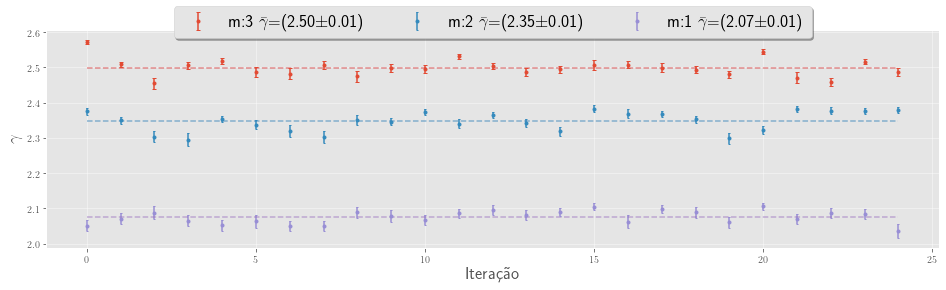

0.0006219815279243493 0.0007707099079672553 0.000341075676825249
0.024939557492552857 0.027761662557693752 0.018468234263871817
0.004987911498510572 0.005552332511538751 0.0036936468527743634


In [122]:
fig=plt.figure(figsize=(16,4))

plt.errorbar(range(len(blista3)),blista3,yerr=sblista3,
             label=r'm:3  $\bar{\gamma}$='+r'({:.2f}$\pm${:.2f})'.format(np.mean(blista3),np.sqrt(np.sum(np.array(sblista3)**2))/5),capsize=2,fmt='.')
plt.hlines(np.mean(blista3),xmin=0,xmax=24,color='tab:red',alpha=.5,linestyle='dashed')
plt.errorbar(range(len(blista2)),blista2,yerr=sblista2,
             label=r'm:2 $\bar{\gamma}$='+r'({:.2f}$\pm${:.2f})'.format(np.mean(blista2),np.sqrt(np.sum(np.array(sblista2)**2))/5),capsize=1,fmt='.')
plt.hlines(np.mean(blista2),xmin=0,xmax=24,color='tab:blue',alpha=.5,linestyle='dashed')
plt.errorbar(range(len(blista1)),blista1,yerr=sblista1,
             label=r'm:1 $\bar{\gamma}$='+r'({:.2f}$\pm${:.2f})'.format(np.mean(blista1),np.sqrt(np.sum(np.array(sblista1)**2))/5),capsize=1,fmt='.')
plt.hlines(np.mean(blista1),xmin=0,xmax=24,color='tab:purple',alpha=.5,linestyle='dashed')
plt.legend(fontsize='xx-large',loc='upper center', bbox_to_anchor=(.5, 1.15),ncol=3,fancybox=True,shadow=True)
plt.ylabel(r'$\gamma$',fontsize='xx-large')
plt.xlabel("Iteração",fontsize='xx-large')
fig.savefig('graficoTD1.png', bbox_inches='tight', dpi=100)
plt.show()
print(np.var(blista3),np.var(blista2),np.var(blista1))
print(np.std(blista3),np.std(blista2),np.std(blista1))
print(np.std(blista3)/5,np.std(blista2)/5,np.std(blista1)/5)

## 1/N graph

In [3]:
Nlist=np.arange(100,1000,100).tolist()+np.arange(1000,11000,1000).tolist()
print(Nlist)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]


In [4]:
blista1N=[]
sblista1N=[]
klista1N=[]

for N in Nlist:
    ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

    links=np.zeros(len(ang))
    links[0]=2
    links[1]=2
    links[2]=2

    for i in range(3,N):
        prob=links/np.sum(links)
        x1,y1=np.cos(ang[i]),np.sin(ang[i])  
        ang_rand1=np.random.choice(ang,p=prob)
        x2,y2=np.cos(ang_rand1),np.sin(ang_rand1)
        links[ang.index(ang[i])]+=1
        links[ang.index(ang_rand1)]+=1

    #print(max(links),min(links))
    y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(1,np.max(links)+1),density=True)
    x =xb[:-1]
    y0=y[y != 0]
    x0=x[y != 0]
    #print(x)
    popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
    b=abs(popt0[1])
    sb=(np.sqrt(np.diag(pcov)))[1]
    
    blista1N.append(b)
    sblista1N.append(sb)
    klista1N.append(max(links))
    print(N,end=',')

100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,

In [5]:
m0=3


blista2N=[]
sblista2N=[]
klista2N=[]

for N in Nlist:

    ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

    links=np.zeros(len(ang))

    links[0]=2
    links[1]=2
    links[2]=2

    for i in range(3,N):
        prob=links/np.sum(links)
        x1,y1=np.cos(ang[i]),np.sin(ang[i])  
        lista=np.random.choice(ang,m0-1,p=prob)
        for ang_rand in lista.tolist():
            x2,y2=np.cos(ang_rand),np.sin(ang_rand)
            links[ang.index(ang_rand)]+=1

        links[ang.index(ang[i])]+=len(lista)

    y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(2,np.max(links)+1),density=True)
    x =xb[:-1]
    y0=y[y != 0]
    x0=x[y != 0]
    popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
    b=abs(popt0[1])
    sb=(np.sqrt(np.diag(pcov)))[1]
    blista2N.append(b)
    sblista2N.append(sb)
    klista2N.append(max(links))
    print(N,end=',')

100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,

In [6]:
m0=3


blista3N=[]
sblista3N=[]
klista3N=[]

for N in Nlist:
    ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

    links=np.zeros(len(ang))

    links[0]=2
    links[1]=2
    links[2]=2

    prim=[0,1,2]
    for i in range(3):
        outros=[p for p in prim if p!=i]
        x1,y1=np.cos(ang[i]),np.sin(ang[i])
        for p in outros:
            x2,y2=np.cos(ang[p]),np.sin(ang[p])
    for i in range(3,N):
        prob=links/np.sum(links)
        x1,y1=np.cos(ang[i]),np.sin(ang[i])  
        lista=np.random.choice(ang,m0,p=prob)
        for ang_rand in lista.tolist():
            x2,y2=np.cos(ang_rand),np.sin(ang_rand)
            links[ang.index(ang_rand)]+=1
        links[ang.index(ang[i])]+=len(lista)

    #print(max(links),min(links))
    y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(3,np.max(links)+1),density=True)
    x =xb[:-1]
    y0=y[y != 0]
    x0=x[y != 0]
    popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
    b=abs(popt0[1])
    sb=(np.sqrt(np.diag(pcov)))[1]
    #print(b,sb)
    
    blista3N.append(b)
    sblista3N.append(sb)
    klista3N.append(max(links))
    print(N,end=',')

100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,

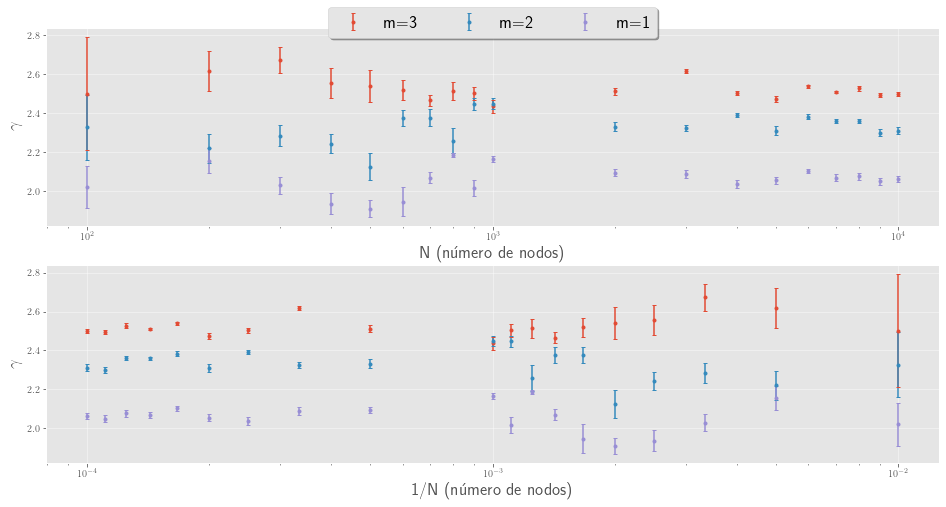

In [32]:
fig=plt.figure(figsize=(16,8))
plt.subplot(2,1,1)

plt.errorbar(np.array(Nlist),blista3N,yerr=sblista3N,capsize=2,fmt='.',label='m=3')
plt.errorbar(np.array(Nlist),blista2N,yerr=sblista2N,capsize=2,fmt='.',label='m=2')
plt.errorbar(np.array(Nlist),blista1N,yerr=sblista1N,capsize=2,fmt='.',label='m=1')
plt.xscale('log')
#plt.yscale('log')
#plt.ylim(1,10)
plt.legend(fontsize='xx-large',loc='upper center', bbox_to_anchor=(.5, 1.15),ncol=3,fancybox=True,shadow=True)
plt.ylabel(r'$\gamma$',fontsize='xx-large')
plt.xlabel("N (número de nodos)",fontsize='xx-large')
plt.subplot(2,1,2)

plt.errorbar(1/np.array(Nlist),blista3N,yerr=sblista3N,capsize=2,fmt='.',label='m=3')
plt.errorbar(1/np.array(Nlist),blista2N,yerr=sblista2N,capsize=2,fmt='.',label='m=2')
plt.errorbar(1/np.array(Nlist),blista1N,yerr=sblista1N,capsize=2,fmt='.',label='m=1')
plt.xscale('log')
#plt.yscale('log')
#plt.ylim(1,10)
#plt.legend(fontsize='xx-large',loc='upper center', bbox_to_anchor=(.5, 1.15),ncol=3,fancybox=True,shadow=True)
plt.ylabel(r'$\gamma$',fontsize='xx-large')
plt.xlabel("1/N (número de nodos)",fontsize='xx-large')
fig.savefig('graficoTD2.png', bbox_inches='tight', dpi=100)
plt.show()


## 1/m

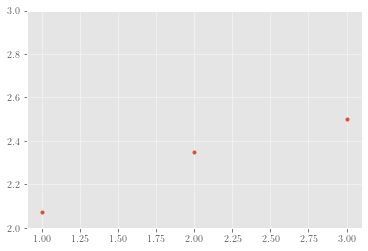

In [219]:
plt.plot([1,2,3],[np.mean(blista1),np.mean(blista2),np.mean(blista3)],'.')
plt.ylim(2,3)
plt.show()

In [58]:
N=10000
blist=[]
sblist=[]
klist=[]
for m in range(2,16):
    ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

    links=np.zeros(len(ang))
    links[0]=m*2

    t=m+1
    for i in range(1,N):
        x1,y1=np.cos(ang[i]),np.sin(ang[i])  
        for mi in range(m):
            if mi==0:
                prob=links/(2*(t)-1)
                prob[i]=1/(2*(t)-1)
                t+=1
                #print(prob,np.sum(prob))
                ang_rand=np.random.choice(ang,p=prob)
                x2,y2=np.cos(ang_rand),np.sin(ang_rand)
                links[ang.index(ang_rand)]+=1 #end
                links[ang.index(ang[i])]+=1 #start
            else:
                prob=links/(2*(t)-2)
                t+=1
                #print(prob,np.sum(prob))
                ang_rand=np.random.choice(ang,p=prob)
                x2,y2=np.cos(ang_rand),np.sin(ang_rand)
                links[ang.index(ang_rand)]+=1 #end
                links[ang.index(ang[i])]+=1 #start

    y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(min(links),np.max(links)+1),density=True)
    x =xb[:-1]
    y0=y[y != 0]
    x0=x[y != 0]
    popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
    b=abs(popt0[1])
    sb=(np.sqrt(np.diag(pcov)))[1]
    sblist.append(sb)
    blist.append(b)
    klist.append(max(links))
    print(m,end=',')

2,3,4,5,6,7,8,9,10,11,12,13,14,15,

In [51]:
def potxb(x,a,b,c):
    return a*x**2+b*x+c
def chi2(ajuste, hist, err, ddof):
    soma=0
    for x,y,z in zip(ajuste,hist,err):
        soma+=(x-y)**2/z**2
    return soma/ddof

[ 0.89139448 -1.75537537  2.98208634]
[0.40566691 0.22067662 0.02151481]
4.7946229359246555


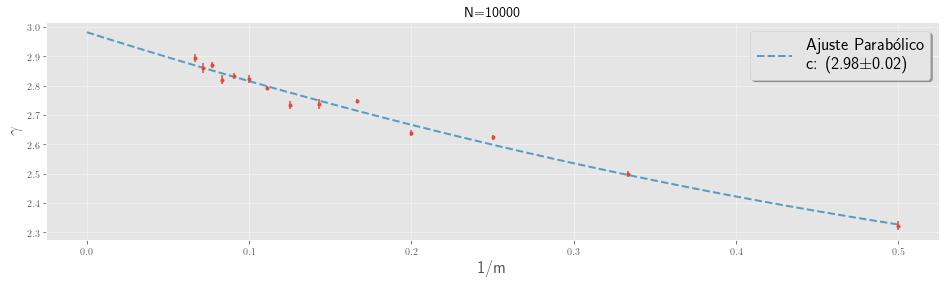

In [77]:
fig=plt.figure(figsize=(16,4))

plt.errorbar(1/np.array(range(2,16)),blist,yerr=sblist,fmt='.',zorder=2)
popt,pcov=curve_fit(potxb,1/np.array(range(2,16)),blist)
print(popt)

print(np.sqrt(np.diag(pcov)))
ajuste=[potxb(xi,*popt) for xi in 1/np.array(range(2,16))]
print(chi2(ajuste,blist,sblist,ddof=len(blist)-len(popt)))
x=np.linspace(0,0.5)
plt.plot(x,potxb(x,*popt),linewidth=2,linestyle='dashed',alpha=0.8,zorder=1,label='Ajuste Parabólico\n '+
         r'c: ({:.2f}$\pm${:.2f})'.format(popt[-1],np.sqrt(np.diag(pcov))[-1]))
plt.legend(fontsize='xx-large',loc='upper right',fancybox=True,shadow=True)
plt.title('N=10000')
plt.ylabel(r'$\gamma$',fontsize='xx-large')
plt.xlabel("1/m ",fontsize='xx-large')
fig.savefig('graficoTD3.png', bbox_inches='tight', dpi=100)

plt.show()
#print(blist)

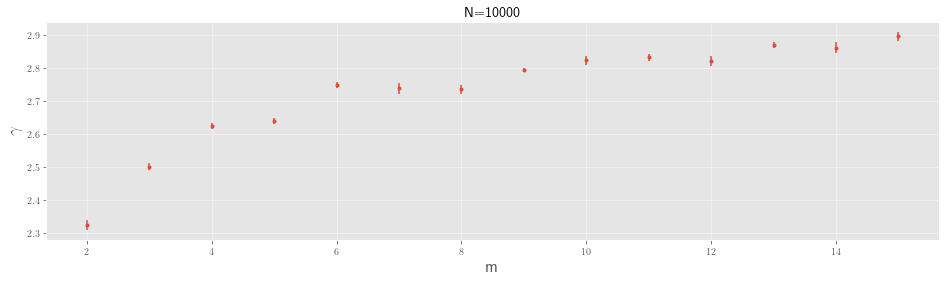

In [82]:
fig=plt.figure(figsize=(16,4))

plt.errorbar(np.array(range(2,16)),blist,yerr=sblist,fmt='.',zorder=2)
# popt,pcov=curve_fit(potxb,1/np.array(range(2,16)),blist)
# print(popt)

# print(np.sqrt(np.diag(pcov)))
# ajuste=[potxb(xi,*popt) for xi in 1/np.array(range(2,16))]
# print(chi2(ajuste,blist,sblist,ddof=len(blist)-len(popt)))
# x=np.linspace(0,0.5)
# plt.plot(x,potxb(x,*popt),linewidth=2,linestyle='dashed',alpha=0.8,zorder=1,label='Ajuste Parabólico\n '+
#          r'c: ({:.2f}$\pm${:.2f})'.format(popt[-1],np.sqrt(np.diag(pcov))[-1]))
# plt.legend(fontsize='xx-large',loc='upper right',fancybox=True,shadow=True)
plt.title('N=10000')
plt.ylabel(r'$\gamma$',fontsize='xx-large')
plt.xlabel("m ",fontsize='xx-large')
fig.savefig('graficoTD4.png', bbox_inches='tight', dpi=100)

plt.show()
#print(blist)

In [90]:
N=1000
blist=[]
sblist=[]
klist=[]
for m in range(2,30):
    
    ang=np.arange(0,2*np.pi,2*np.pi/N).tolist()

    links=np.zeros(len(ang))
    links[0]=m*2

    t=m+1
    for i in range(1,N):
        x1,y1=np.cos(ang[i]),np.sin(ang[i])  
        for mi in range(m):
            if mi==0:
                prob=links/(2*(t)-1)
                prob[i]=1/(2*(t)-1)
                t+=1
                #print(prob,np.sum(prob))
                ang_rand=np.random.choice(ang,p=prob)
                x2,y2=np.cos(ang_rand),np.sin(ang_rand)
                links[ang.index(ang_rand)]+=1 #end
                links[ang.index(ang[i])]+=1 #start
            else:
                prob=links/(2*(t)-2)
                t+=1
                #print(prob,np.sum(prob))
                ang_rand=np.random.choice(ang,p=prob)
                x2,y2=np.cos(ang_rand),np.sin(ang_rand)
                links[ang.index(ang_rand)]+=1 #end
                links[ang.index(ang[i])]+=1 #start

    y,xb=np.histogram(links,bins=int(np.max(links)-np.min(links)+1),range=(min(links),np.max(links)+1),density=True)
    x =xb[:-1]
    y0=y[y != 0]
    x0=x[y != 0]
    popt0,pcov=curve_fit(potx,np.array(x0),np.array(y0),p0=[7,-3])
    b=abs(popt0[1])
    sb=(np.sqrt(np.diag(pcov)))[1]
    sblist.append(sb)
    blist.append(b)
    klist.append(max(links))
    print(m,end=',')

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,

[ 0.50141695 -1.66004921  2.9642923 ]
[0.73038313 0.35152367 0.02491173]
1.1588965945093408


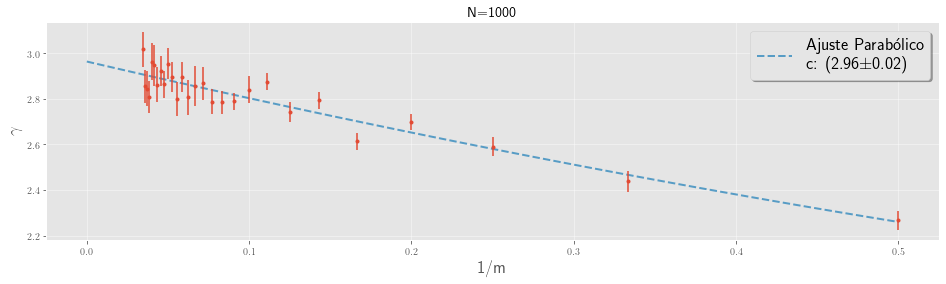

In [93]:
fig=plt.figure(figsize=(16,4))

plt.errorbar(1/np.array(range(2,30)),blist,yerr=sblist,fmt='.',zorder=2)
popt,pcov=curve_fit(potxb,1/np.array(range(2,30)),blist)
print(popt)

print(np.sqrt(np.diag(pcov)))
ajuste=[potxb(xi,*popt) for xi in 1/np.array(range(2,30))]
print(chi2(ajuste,blist,sblist,ddof=len(blist)-len(popt)))
x=np.linspace(0,0.5)
plt.plot(x,potxb(x,*popt),linewidth=2,linestyle='dashed',alpha=0.8,zorder=1,label='Ajuste Parabólico\n '+
         r'c: ({:.2f}$\pm${:.2f})'.format(popt[-1],np.sqrt(np.diag(pcov))[-1]))
plt.legend(fontsize='xx-large',loc='upper right',fancybox=True,shadow=True)
plt.title('N=1000')
plt.ylabel(r'$\gamma$',fontsize='xx-large')
plt.xlabel("1/m ",fontsize='xx-large')
fig.savefig('graficoTD5.png', bbox_inches='tight', dpi=100)

plt.show()
#print(blist)

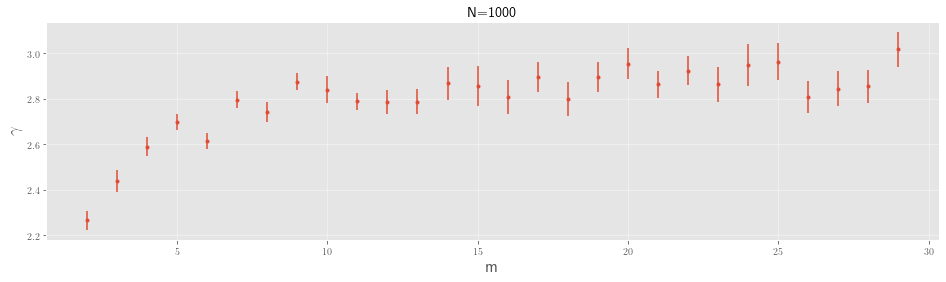

In [95]:
fig=plt.figure(figsize=(16,4))

plt.errorbar(np.array(range(2,30)),blist,yerr=sblist,fmt='.',zorder=2)
# popt,pcov=curve_fit(potxb,1/np.array(range(2,16)),blist)
# print(popt)

# print(np.sqrt(np.diag(pcov)))
# ajuste=[potxb(xi,*popt) for xi in 1/np.array(range(2,16))]
# print(chi2(ajuste,blist,sblist,ddof=len(blist)-len(popt)))
# x=np.linspace(0,0.5)
# plt.plot(x,potxb(x,*popt),linewidth=2,linestyle='dashed',alpha=0.8,zorder=1,label='Ajuste Parabólico\n '+
#          r'c: ({:.2f}$\pm${:.2f})'.format(popt[-1],np.sqrt(np.diag(pcov))[-1]))
# plt.legend(fontsize='xx-large',loc='upper right',fancybox=True,shadow=True)
plt.title('N=1000')
plt.ylabel(r'$\gamma$',fontsize='xx-large')
plt.xlabel("m ",fontsize='xx-large')
fig.savefig('graficoTD6.png', bbox_inches='tight', dpi=100)

plt.show()
#print(blist)